In [100]:
# pip install prince

You should consider upgrading via the '/Users/duy/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Principal component analysis (PCA)

If you're using PCA it is assumed you have a dataframe consisting of numerical continuous variables. In this example we're going to be using the Iris flower dataset.

In [101]:
import pandas as pd
import prince
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
X = pd.DataFrame(data=X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y = pd.Series(y).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000


The PCA class implements scikit-learn's fit/transform API. It's parameters have to passed at initialisation before calling the fit method.

In [102]:
pca = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
pca = pca.fit(X)

Once the PCA has been fitted, it can be used to extract the row principal coordinates.

In [103]:
pca.transform(X).head() # same as pca.row_coordinates(X).head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


Each column stands for a principal component whilst each row stands a row in the original dataset. You can display these projections with the plot_row_coordinates method:

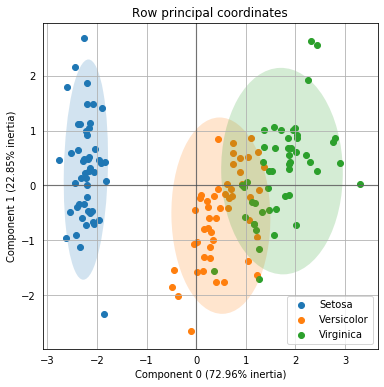

In [104]:
ax = pca.plot_row_coordinates(
    X,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    labels=None,
    color_labels=y,
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)
ax.get_figure().savefig('pca_row_coordinates.svg')

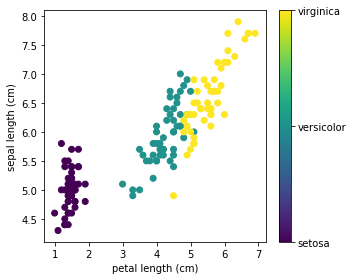

In [105]:
# So sánh với khi không sử dụng PCA
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 2
y_index = 0

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

The explained inertia represents the percentage of the inertia each principal component contributes.

In [106]:
pca.explained_inertia_

array([0.72962445, 0.22850762])

The explained inertia is obtained by dividing the eigenvalues obtained with the SVD by the total inertia, both of which are also accessible.

In [107]:
pca.eigenvalues_

array([2.91849782, 0.91403047])

In [108]:
pca.total_inertia_

4.000000000000001

You can also obtain the correlations between the original variables and the principal components.

In [109]:
pca.column_correlations(X)

,0,1
Petal length,0.991555,0.023415
Petal width,0.964979,0.064000
Sepal length,0.890169,0.360830
Sepal width,-0.460143,0.882716


You can also transform row projections back into their original space by using the inverse_transform method.

In [110]:
pca.inverse_transform(pca.transform(X)).head()

,0,1,2,3
0,5.018949,3.514854,1.466013,0.251922
1,4.738463,3.030433,1.603913,0.272074
2,4.720130,3.196830,1.328961,0.167414
3,4.668436,3.086770,1.384170,0.182247
4,5.017093,3.596402,1.345411,0.206706


In [112]:
# compare with first 5 observations of the original data
X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.100000,3.500000,1.400000,0.200000
1,4.900000,3.000000,1.400000,0.200000
2,4.700000,3.200000,1.300000,0.200000
3,4.600000,3.100000,1.500000,0.200000
4,5.000000,3.600000,1.400000,0.200000


# Phân tích tương ứng (Correspondence analysis - CA)


In [149]:
# Dữ liệu "Relationship of Hair Color to Eye Color of Scottish Schoolchildren"
# http://ce.aut.ac.ir/~shiry/lecture/Advanced%20Machine%20Learning/Manifold_Modern_Multivariate%20Statistical%20Techniques%20-%20Regres.pdf
# page: 662
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))
X = pd.DataFrame(
    data=[
          [326, 38, 241, 110, 3],
          [688, 116, 584, 188, 4],
          [343, 84, 909, 412, 26],
          [98, 48, 403, 681, 85]
    ],
    columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']),
    index=pd.Series(['Blue', 'Light', 'Medium', 'Dark'])
)
X



,Fair,Red,Medium,Dark,Black
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


In [156]:
import prince
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
X.columns.rename('Hair color', inplace=True)
X.index.rename('Eye color', inplace=True)
ca = ca.fit(X)

In [157]:
ca.row_coordinates(X)

,0,1
Blue,-0.400300,-0.165411
Light,-0.440708,-0.088463
Medium,0.033614,0.245002
Dark,0.702739,-0.133914


In [158]:
ca.column_coordinates(X)

,0,1
Fair,-0.543995,-0.173844
Red,-0.233261,-0.048279
Medium,-0.042024,0.208304
Dark,0.588709,-0.103950
Black,1.094388,-0.286437


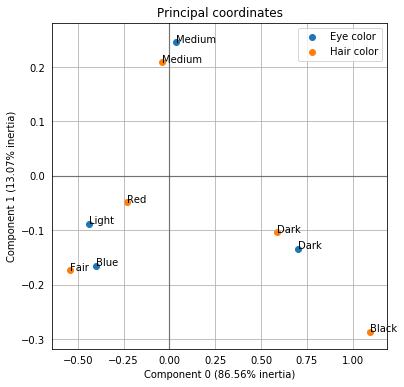

In [160]:
ax = ca.plot_coordinates(
    X=X,
    ax=None,
    figsize=(6, 6),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True
)
ax.get_figure().savefig('ca_coordinates.svg')

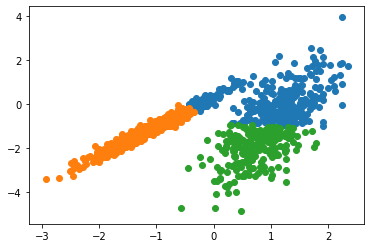

In [165]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Linear Discriminant Analysis (LDA)

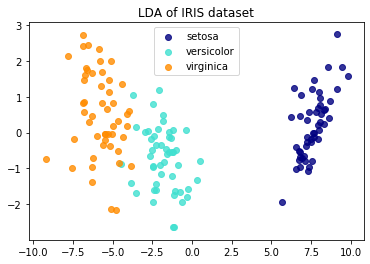

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()